# Data Classification

**Import libs**

In [130]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

In [47]:
df = pd.read_csv("../Dataset/conversion_data.csv")
df.head(10)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


In [48]:
df.describe(include="all")

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [49]:
df.converted[df.converted == 1].value_counts()

1    10200
Name: converted, dtype: int64

In [50]:
df.new_user = df.new_user.apply(lambda x: "Yes" if x == 1 else "No")
df.head(10)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,Yes,Ads,1,0
1,US,23,Yes,Seo,5,0
2,US,28,Yes,Seo,4,0
3,China,39,Yes,Seo,5,0
4,US,30,Yes,Seo,6,0
5,US,31,No,Seo,1,0
6,China,27,Yes,Seo,4,0
7,US,23,No,Ads,4,0
8,UK,29,No,Direct,4,0
9,US,25,No,Ads,2,0


In [51]:
df.converted = df.converted.apply(lambda x: "Yes" if x == 1 else "No")
df.head(10)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,Yes,Ads,1,No
1,US,23,Yes,Seo,5,No
2,US,28,Yes,Seo,4,No
3,China,39,Yes,Seo,5,No
4,US,30,Yes,Seo,6,No
5,US,31,No,Seo,1,No
6,China,27,Yes,Seo,4,No
7,US,23,No,Ads,4,No
8,UK,29,No,Direct,4,No
9,US,25,No,Ads,2,No


In [52]:
df.converted[df.converted == "Yes"].value_counts()

Yes    10200
Name: converted, dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  object
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  object
dtypes: int64(2), object(4)
memory usage: 14.5+ MB


In [54]:
df.country = df.country.astype('category')
df.new_user = df.new_user.astype('category')
df.source = df.source.astype('category')
df.converted = df.converted.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   country              316200 non-null  category
 1   age                  316200 non-null  int64   
 2   new_user             316200 non-null  category
 3   source               316200 non-null  category
 4   total_pages_visited  316200 non-null  int64   
 5   converted            316200 non-null  category
dtypes: category(4), int64(2)
memory usage: 6.0 MB


In [55]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ["country", "age", "new_user", "source", "total_pages_visited"]
target_variable = "converted"

X = df.loc[:,features_list]
y = df.loc[:,target_variable]

print("...Done.")
print()

print('y : ')
print(y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

y : 
0    No
1    No
2    No
3    No
4    No
Name: converted, dtype: category
Categories (2, object): [No, Yes]

X :
  country  age new_user source  total_pages_visited
0      UK   25      Yes    Ads                    1
1      US   23      Yes    Seo                    5
2      US   28      Yes    Seo                    4
3   China   39      Yes    Seo                    5
4      US   30      Yes    Seo                    6


In [56]:
# Search categorical features and numeric features

idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
  if ('float' in str(t)) or ('int' in str(t)) :
    numeric_features.append(i)
    numeric_indices.append(idx)
  else :
    categorical_features.append(i)
    categorical_indices.append(idx)

  idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['age', 'total_pages_visited']  at positions  [1, 4]
Found categorical features  ['country', 'new_user', 'source']  at positions  [0, 2, 3]


**Divide dataset into train set & test set**

In [57]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



**Convert into numpy array**

In [58]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
y_train = y_train.tolist()
y_test = y_test.tolist()
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(y_train[0:5])
print(y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[['US' 27 'Yes' 'Seo' 19]
 ['US' 34 'No' 'Seo' 1]
 ['China' 23 'Yes' 'Seo' 5]
 ['China' 42 'No' 'Seo' 7]
 ['UK' 24 'Yes' 'Direct' 4]]
[['China' 33 'Yes' 'Ads' 3]
 ['US' 31 'Yes' 'Direct' 4]]

['Yes', 'No', 'No', 'No', 'No']
['No', 'No']


# Training Pipeline

In [59]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_train[0:5,:])

# Normalization
numeric_transformer = StandardScaler()

# OneHotEncoder
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_indices),
        ('cat', categorical_transformer, categorical_indices)        
        ]
    )

X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...

[['US' 27 'Yes' 'Seo' 19]
 ['US' 34 'No' 'Seo' 1]
 ['China' 23 'Yes' 'Seo' 5]
 ['China' 42 'No' 'Seo' 7]
 ['UK' 24 'Yes' 'Direct' 4]]
...Done
[[-0.43186335  4.22843969  0.          0.          1.          1.
   0.          1.        ]
 [ 0.41465401 -1.16004158  0.          0.          1.          0.
   0.          1.        ]
 [-0.91558756  0.03739871  0.          0.          0.          1.
   0.          1.        ]
 [ 1.38210242  0.63611885  0.          0.          0.          0.
   0.          1.        ]
 [-0.79465651 -0.26196136  0.          1.          0.          1.
   1.          0.        ]]


**Encoding labels**

In [60]:
print('Encoding labels.....')
print(y_train[0:5])
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
print('....Done')
print(y_train[0:5])

Encoding labels.....
['Yes', 'No', 'No', 'No', 'No']
....Done
[1 0 0 0 0]


**Training Model on train set**

In [61]:
# Train model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print("...Done.")

Train model...
...Done.


In [62]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print(y_train_pred)
print()

Predictions on training set...
...Done.
[1 0 0 ... 0 0 0]



# Test Pipeline

In [63]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_test[0:5,:])

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...

[['China' 33 'Yes' 'Ads' 3]
 ['US' 31 'Yes' 'Direct' 4]
 ['US' 42 'Yes' 'Ads' 2]
 ['China' 40 'No' 'Seo' 4]
 ['US' 25 'Yes' 'Seo' 10]]
...Done
[[ 0.29372296 -0.56132143  0.          0.          0.          1.
   0.          0.        ]
 [ 0.05186085 -0.26196136  0.          0.          1.          1.
   1.          0.        ]
 [ 1.38210242 -0.8606815   0.          0.          1.          1.
   0.          0.        ]
 [ 1.14024032 -0.26196136  0.          0.          0.          0.
   0.          1.        ]
 [-0.67372546  1.53419906  0.          0.          1.          1.
   0.          1.        ]]


**Encoding labels**

In [64]:
print('Encoding labels.....')
print(y_test[0:5])

y_test = labelencoder.transform(y_test)
print('....Done')
print(y_test[0:5])

Encoding labels.....
['No', 'No', 'No', 'No', 'No']
....Done
[0 0 0 0 0]


**Predictions on test set**

In [65]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print(y_test_pred[0:5])
print()

Predictions on test set...
...Done.
[0 0 0 0 0]



# Performance assessment

In [66]:
# Print Accuracy scores
print("Accuracy score on training set : ", accuracy_score(y_train, y_train_pred))
print("Accuracy score on training set : ", accuracy_score(y_test, y_test_pred))

Accuracy score on training set :  0.9861914927261227
Accuracy score on training set :  0.9860847564832385


In [67]:
# K-fold cross-vamidation

X = np.append(X_train, X_test, axis=0)
y = np.append(y_train, y_test)

scores = np.array(cross_val_score(classifier, X, y, cv=10))
predictions = np.array(cross_val_predict(classifier, X, y, cv=10))
print('Scores : %s' % scores[0:5])
print("Scores mean : %0.2f" % scores.mean())
print('Predictions : %s' % predictions[0:5])
print("Predictions mean : %0.2f" % predictions.mean())

Scores : [0.98580013 0.98652751 0.98627451 0.98570525 0.98602151]
Scores mean : 0.99
Predictions : [1 0 0 0 0]
Predictions mean : 0.03


In [68]:
print('Confusion matrix on train set :')
print(confusion_matrix(y_train, y_train_pred))
print('Confusion matrix on test set :')
print(confusion_matrix(y_test, y_test_pred))

Confusion matrix on train set :
[[243844    956]
 [  2537   5623]]
Confusion matrix on test set :
[[60957   243]
 [  637  1403]]


***Confusion Matrix Train Set***

*Seaborn*

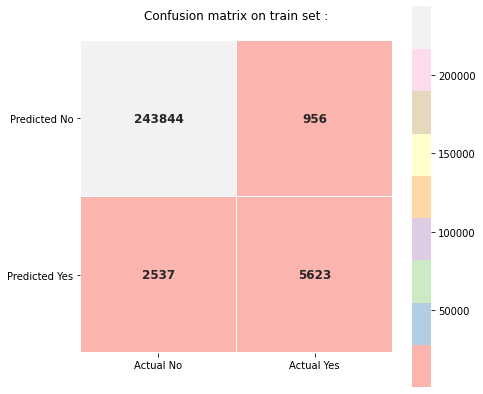

In [103]:
conf_matrix_train = np.array(confusion_matrix(y_train, y_train_pred))

plt.figure(figsize=(7, 7))

ax = sns.heatmap(conf_matrix_train, square=True, linewidths=0.1, fmt="d", annot=True, annot_kws={"fontsize":12, "weight": "bold"}, cmap="Pastel1", yticklabels=["Predicted No", "Predicted Yes"], xticklabels=["Actual No", "Actual Yes"])  
ax.set_title('Confusion matrix on train set :\n')
plt.yticks(rotation=0)

plt.show()

*Plotly*

In [129]:
fig = go.Figure(data=go.Heatmap(
    z=conf_matrix_train,
    y=["Predicted No  ", "Predicted Yes  "], 
    x=["Actual No", "Actual Yes"],
    opacity=0.8,
    xgap=3,
    ygap=3,
    colorscale="viridis"))

fig.update_layout(
    title="Confusion Matrix for the training set",
    font=dict(
        family="Roboto, monospace",
        size=14,
        color="#7f7f7f"
    )
)

fig.show()

***Confusion Matrix Test Set***

In [151]:
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

fig = ff.create_annotated_heatmap(conf_matrix_test, 
                                    colorscale='armyrose',
                                    y=["Predicted No  ", "Predicted Yes  "], 
                                    x=["Actual No", "Actual Yes"])

fig.update_layout(
    title="Confusion Matrix for the test set",
    font=dict(
        family="Roboto, monospace",
        size=14,
        color="#7f7f7f"
    )
)

fig.show()

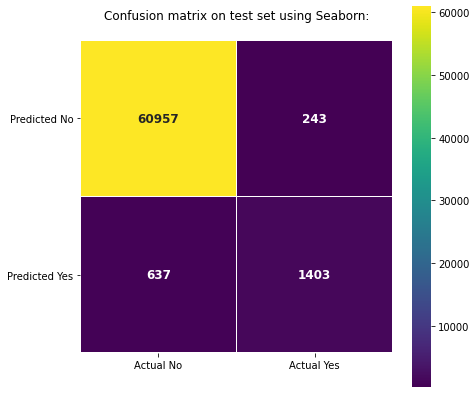

In [155]:
conf_matrix_train = np.array(confusion_matrix(y_test, y_test_pred))

plt.figure(figsize=(7, 7))

ax = sns.heatmap(conf_matrix_train, square=True, linewidths=0.1, fmt="d", annot=True, annot_kws={"fontsize":12, "weight": "bold"}, cmap="viridis", yticklabels=["Predicted No", "Predicted Yes"], xticklabels=["Actual No", "Actual Yes"])  
ax.set_title('Confusion matrix on test set using Seaborn:\n')
plt.yticks(rotation=0)

plt.show()

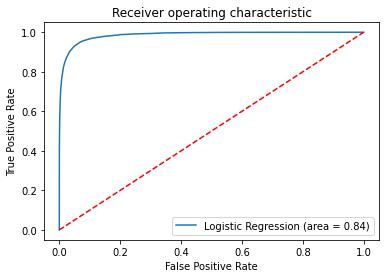

In [156]:
logit_roc_auc = roc_auc_score(y, classifier.predict(X))
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()